## **EDA on Home Loan Dataset**

### **Phase 1: Data Collection and Preparation**

In [95]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Task 1.1: Load the Home Loan dataset into a Pandas DataFrame.

In [96]:
# The URL of the raw train data CSV file
url = 'https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv'

# Read the CSV file directly into a pandas DataFrame
df = pd.read_csv(url)
print("Dataset loaded successfully!")
print("\nFirst 5 rows of the DataFrame:")
df.head()

Dataset loaded successfully!

First 5 rows of the DataFrame:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Task 1.2: Inspect the dataset for missing values, duplicates, and data type inconsistencies.

In [97]:
#Getting the count of missing values for every column
print("\nMissing Values Count per Column")
missing_values = df.isnull().sum()
missing_values


Missing Values Count per Column


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [98]:
# Getting the total count of duplicated values
total_duplicates = df.duplicated().sum()
print(f"\nTotal Number of Duplicated values: {total_duplicates}")


Total Number of Duplicated values: 0


In [99]:
# checking the data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [100]:
# checking the column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [101]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Task 1.3: Clean the dataset by handling missing values, correcting data types, and addressing outliers.

In [102]:
df.shape

(614, 13)

In [103]:
# copying the data into a new dataframe 
loan_data = df.copy()

In [104]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [105]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [106]:
missing_cols = ['Gender','Married','Dependents', 'Self_Employed','Loan_Amount_Term', 'Credit_History',]

In [107]:
for col in missing_cols:
    mode_value = loan_data[col].mode()[0]
    loan_data[col].fillna(mode_value, inplace = True)
    print(f"Filled missing values in '{col}' with Mode: {mode_value}")

Filled missing values in 'Gender' with Mode: Male
Filled missing values in 'Married' with Mode: Yes
Filled missing values in 'Dependents' with Mode: 0
Filled missing values in 'Self_Employed' with Mode: No
Filled missing values in 'Loan_Amount_Term' with Mode: 360.0
Filled missing values in 'Credit_History' with Mode: 1.0


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29468\4343721.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data[col].fillna(mode_value, inplace = True)


In [108]:
# filling the missing values with the median of the LoanAmount
median_loan_amount = loan_data['LoanAmount'].median()
loan_data['LoanAmount'].fillna(median_loan_amount, inplace=True)
print(f"filling the missing values with the median of the loan amount: {median_loan_amount}")

filling the missing values with the median of the loan amount: 128.0


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29468\3026005303.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['LoanAmount'].fillna(median_loan_amount, inplace=True)


In [109]:
# checking for the missing data filling if complete
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [110]:
# converting the datatype
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].astype('int64')

In [111]:
#removing the + from 3+ to ensure the data is clean
loan_data['Dependents'] = loan_data['Dependents'].str.replace('+', '')

#Converting to integer datatype
loan_data['Dependents'] =(loan_data['Dependents']).astype('int64')

In [112]:
# converting the data type of this columns to category
categorical = ['Gender','Married','Education','Self_Employed','Property_Area','Credit_History','Loan_Status']

for col in categorical:
    loan_data[col] = loan_data[col].astype('category')
    print(f"Converted '{col}' datatype to type: {loan_data[col].dtype}")

Converted 'Gender' datatype to type: category
Converted 'Married' datatype to type: category
Converted 'Education' datatype to type: category
Converted 'Self_Employed' datatype to type: category
Converted 'Property_Area' datatype to type: category
Converted 'Credit_History' datatype to type: category
Converted 'Loan_Status' datatype to type: category


In [113]:
loan_data.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents              int64
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term        int64
Credit_History       category
Property_Area        category
Loan_Status          category
dtype: object

In [114]:
# Calculating Outlier Boundaries using (IQR Method) 

# Defining the numerical columns we want to check for outliers
numerical_cols = ['ApplicantIncome', 'LoanAmount','CoapplicantIncome']

for col in numerical_cols:
    print(f"\nAnalyzing the numerical columns: {col}")

    # Calculating Quartiles and IQR
    Q1 = loan_data[col].quantile(0.25)
    Q3 = loan_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Defining the bounds (1.5 * IQR rule)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying the number of outliers
    outliers_upper = loan_data[loan_data[col] > upper_bound]
    outliers_lower = loan_data[loan_data[col] < lower_bound]


    print(f"Q1 (25th percentile): {Q1:.2f}")
    print(f"Q3 (75th percentile): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}\n")
    print(f"Upper Bound: {upper_bound:.2f}\n")
    print(f"Lower Bound: {lower_bound:.2f}")

    # Display counts of outliers
    total_outliers = len(outliers_upper) + len(outliers_lower)
    print(f"\nTotal Outliers Detected: {total_outliers} rows.")

    # Showing a sample of the outliers
    if len(outliers_upper) > 0:
        print(f"Sample of {col} Upper Outliers:")
        print(outliers_upper[[col]].sort_values(by=col, ascending=False).head(3))



Analyzing the numerical columns: ApplicantIncome
Q1 (25th percentile): 2877.50
Q3 (75th percentile): 5795.00
IQR: 2917.50

Upper Bound: 10171.25

Lower Bound: -1498.75

Total Outliers Detected: 50 rows.
Sample of ApplicantIncome Upper Outliers:
     ApplicantIncome
409            81000
333            63337
171            51763

Analyzing the numerical columns: LoanAmount
Q1 (25th percentile): 100.25
Q3 (75th percentile): 164.75
IQR: 64.50

Upper Bound: 261.50

Lower Bound: 3.50

Total Outliers Detected: 41 rows.
Sample of LoanAmount Upper Outliers:
     LoanAmount
171       700.0
130       650.0
155       600.0

Analyzing the numerical columns: CoapplicantIncome
Q1 (25th percentile): 0.00
Q3 (75th percentile): 2297.25
IQR: 2297.25

Upper Bound: 5743.12

Lower Bound: -3445.88

Total Outliers Detected: 18 rows.
Sample of CoapplicantIncome Upper Outliers:
     CoapplicantIncome
600            41667.0
581            33837.0
417            20000.0


In [115]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### **Phase 2: Exploratory Data Analysis (EDA)**

### Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data.



In [116]:
print("\nDescriptive Statistics for Numerical Features")
numerical_summary = loan_data.select_dtypes(include=['float64', 'int64']).columns
loan_data[numerical_summary].describe().T


Descriptive Statistics for Numerical Features


,count,mean,std,min,25%,50%,75%,max
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0


In [117]:
print("\nDescriptive Statistics for Categorical Features")
categorical_summary = loan_data.select_dtypes(include=["category"]).columns
loan_data[categorical_summary].describe().T


Descriptive Statistics for Categorical Features


,count,unique,top,freq
Gender,614,2,Male,502
Married,614,2,Yes,401
Education,614,2,Graduate,480
Self_Employed,614,2,No,532
Credit_History,614.0,2.0,1.0,525.0
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


### Task 2.2: Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.

In [118]:

def univariate_numerical_eda(loan_data, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    
    print(loan_data[column].describe().to_frame())
    print(f"\nSkewness: {loan_data[column].skew():.3f}")
    print(f"Kurtosis: {loan_data[column].kurt():.3f}")
    
    # Plotting the histogram and boxplot
    plt.figure(figsize=(14,5))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(loan_data[column], kde=True, bins=30, color='#4C72B0')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=loan_data[column], color='#DD8452')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Skewness Analysis
    column_skew = loan_data[column].skew()
    
    print("\nSkewness Analysis")
    if abs(column_skew) > 1:
        print(f"{column} is highly skewed.")
    elif abs(column_skew) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")

 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000

Skewness: 6.540
Kurtosis: 60.541


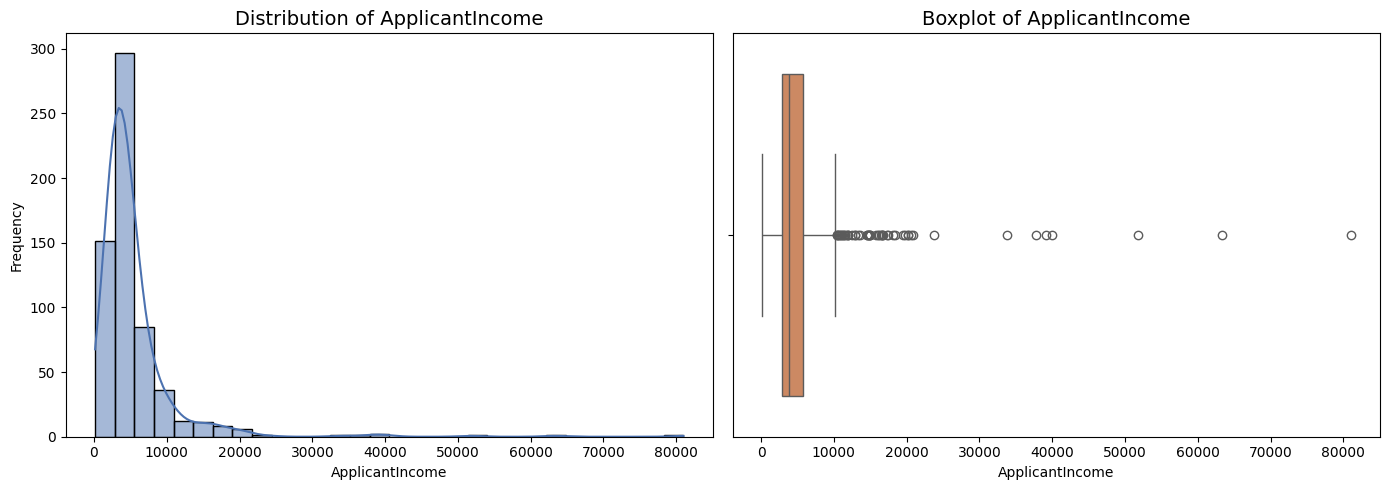


Skewness Analysis
ApplicantIncome is highly skewed.
 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   145.752443
std     84.107233
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    700.000000

Skewness: 2.743
Kurtosis: 10.937


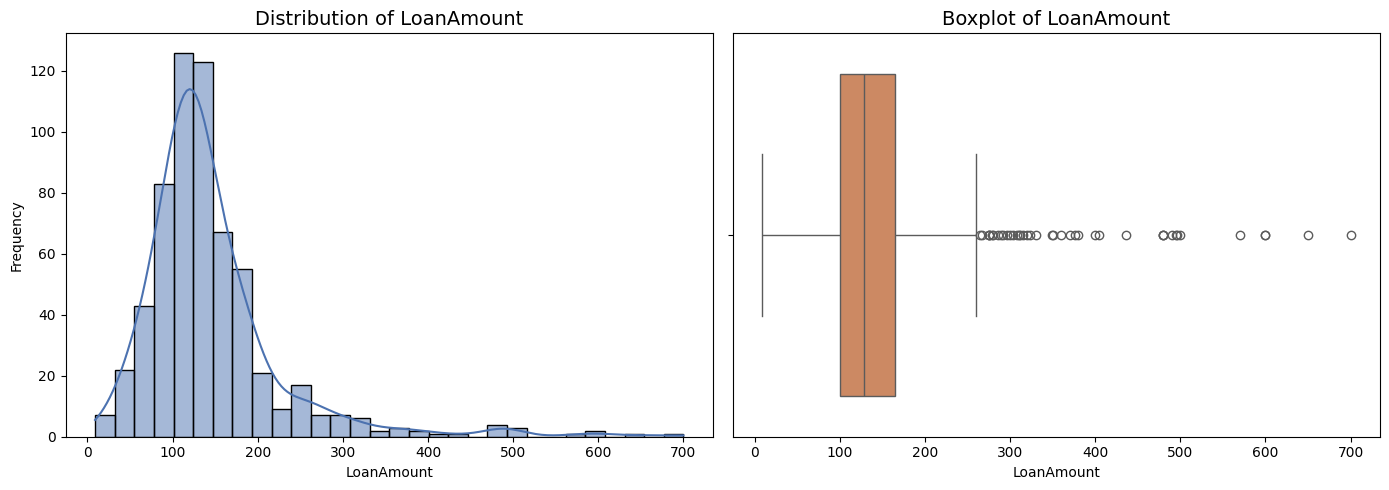


Skewness Analysis
LoanAmount is highly skewed.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000

Skewness: 7.492
Kurtosis: 84.956


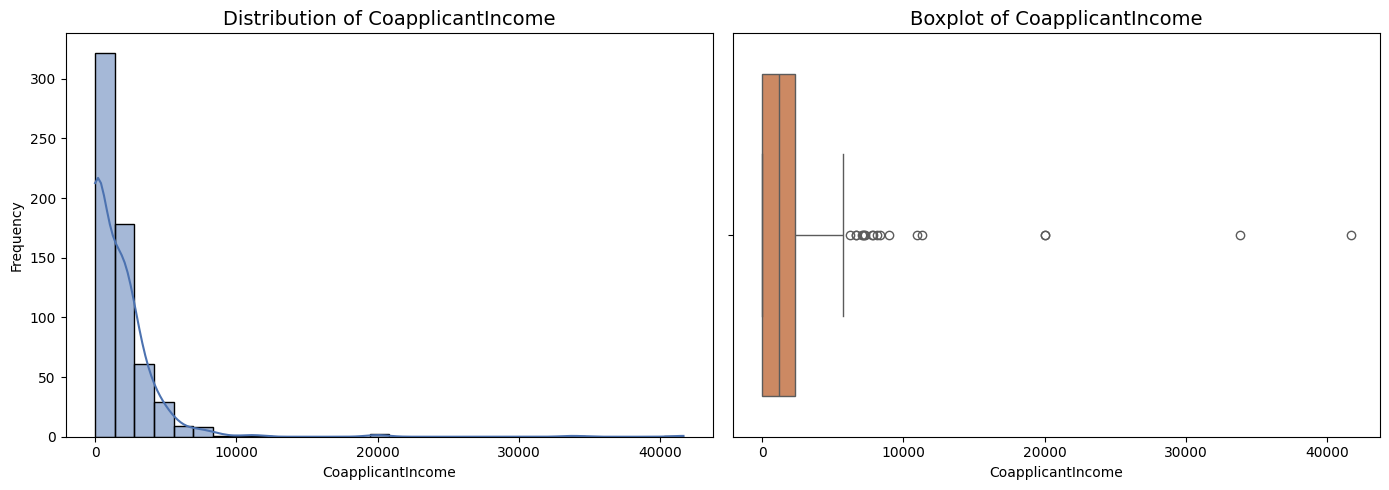


Skewness Analysis
CoapplicantIncome is highly skewed.


In [119]:
for col in numerical_cols:
    univariate_numerical_eda(loan_data, col)

### Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.

In [120]:

def univariate_categorical_eda(loan_data, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f" Feature: {column}")
    print("="*50)
    
    # Calculate counts and percentages
    freq = loan_data[column].value_counts()
    prop = loan_data[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    
    plt.figure(figsize=(14, 6))

    # Subplot 1: Bar Chart (Count Plot)
    plt.subplot(1, 2, 1)
    sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')
    plt.title(f'Count Distribution of {column}', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(column)

    # Subplot 2: Pie Chart (Percentage Distribution)
    plt.subplot(1, 2, 2)
    plt.pie(prop, labels=freq.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
    plt.title(f'Percentage Distribution of {column}', fontsize=14)
    plt.axis('equal') 
    
    plt.tight_layout()
    plt.show()




 Feature: Gender
        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29468\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


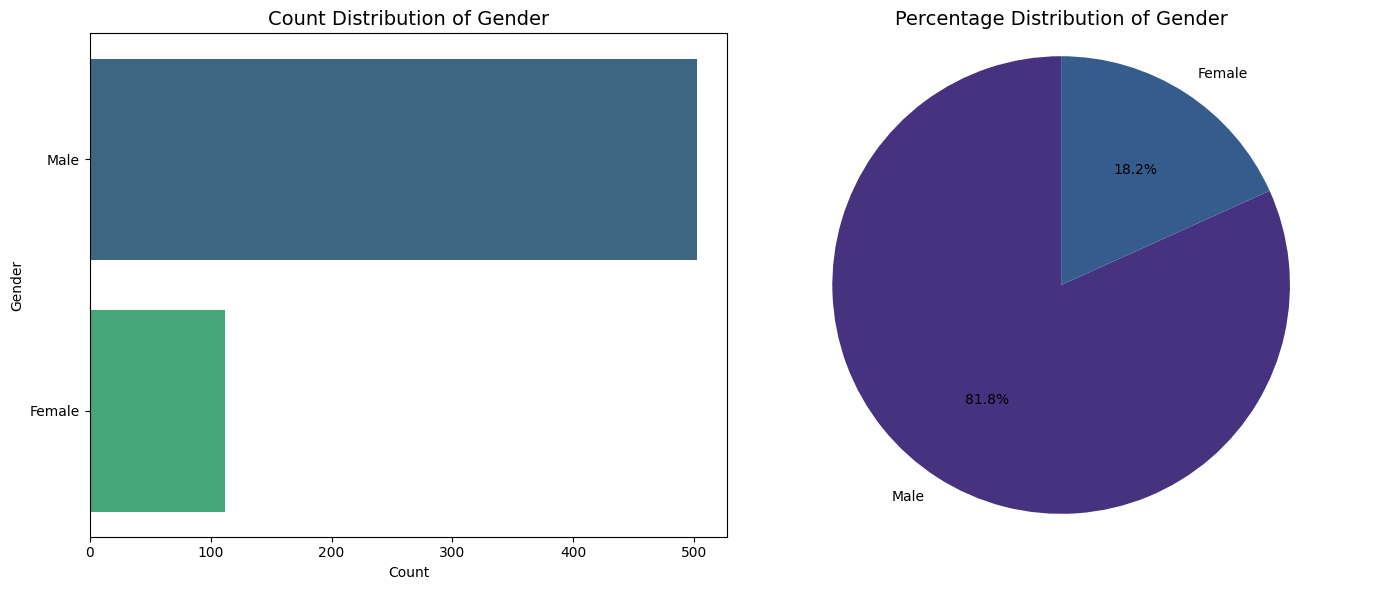

 Feature: Married
         Count  Percentage
Married                   
Yes        401       65.31
No         213       34.69


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29468\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


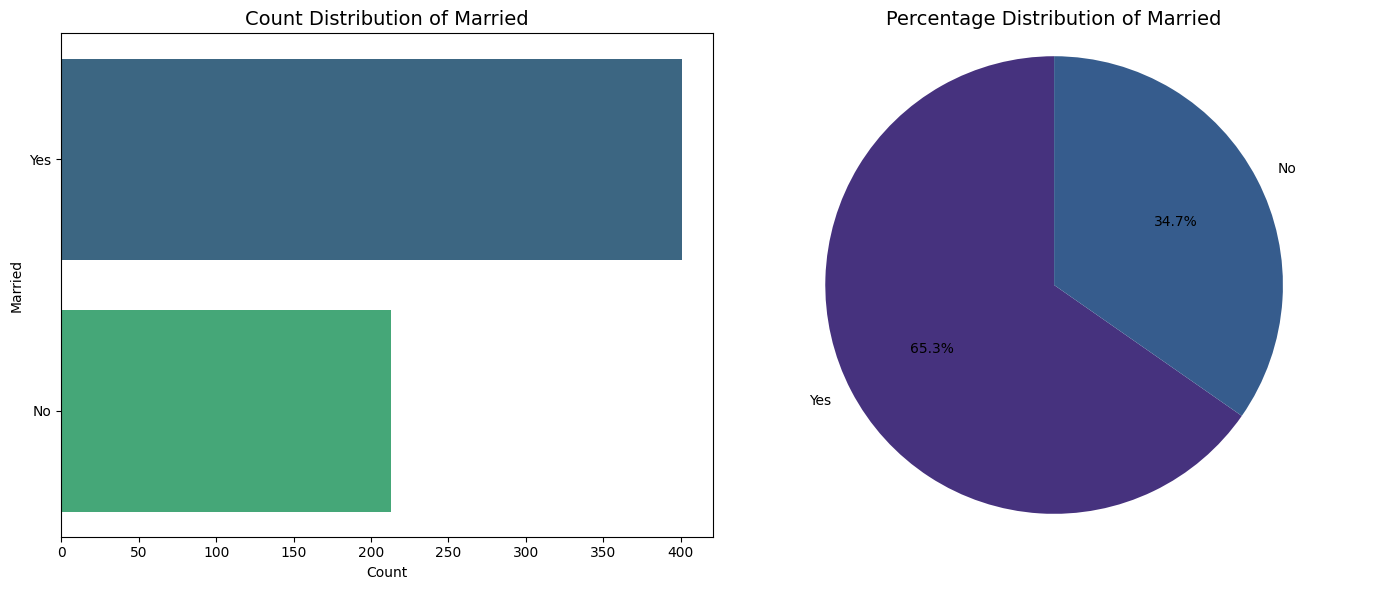

 Feature: Education
              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29468\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


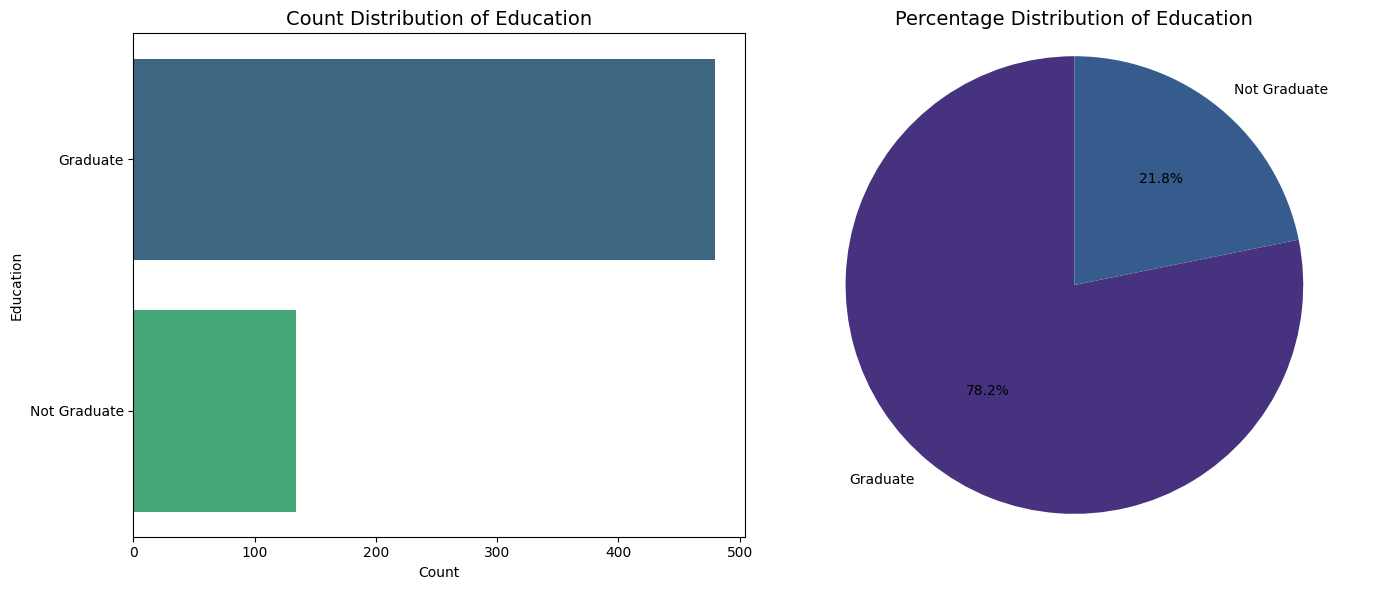

 Feature: Self_Employed
               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29468\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


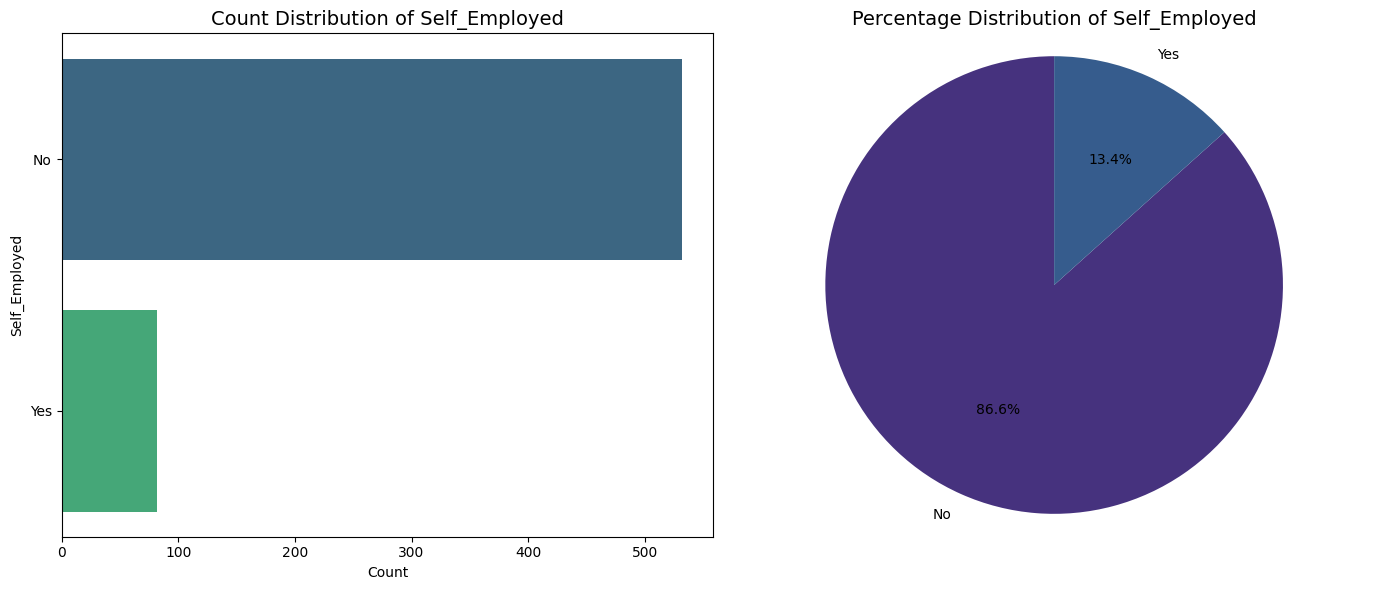

 Feature: Property_Area
               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29468\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


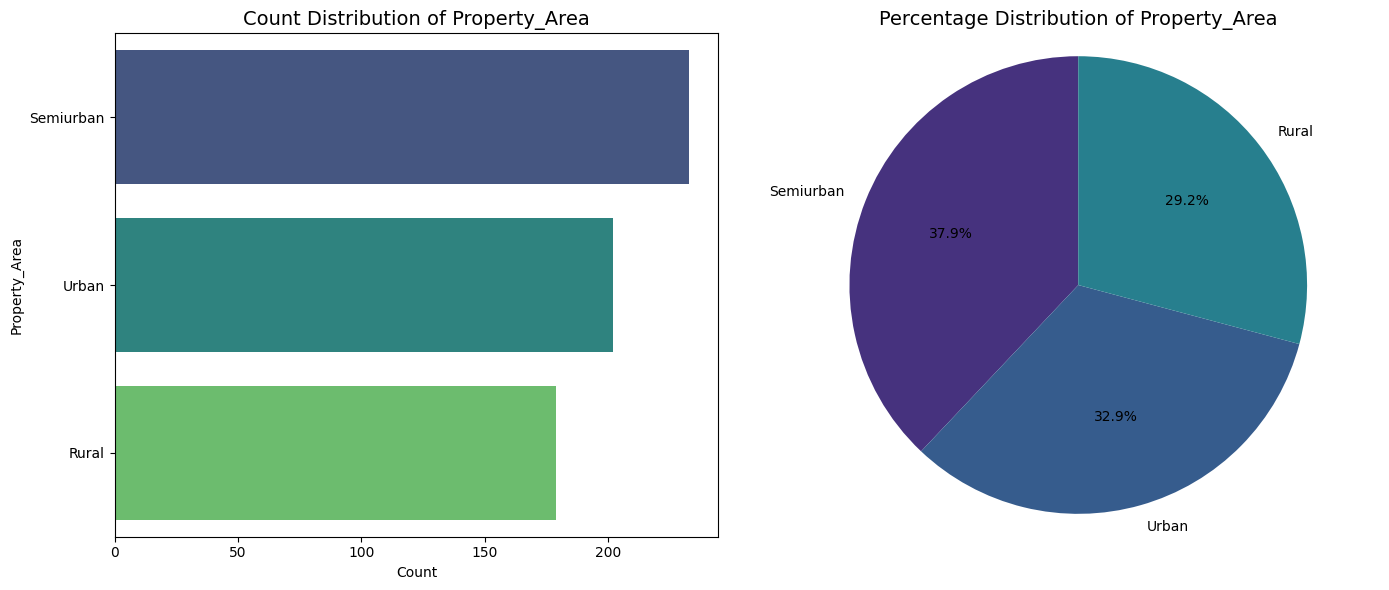

 Feature: Credit_History
                Count  Percentage
Credit_History                   
1.0               525        85.5
0.0                89        14.5


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29468\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


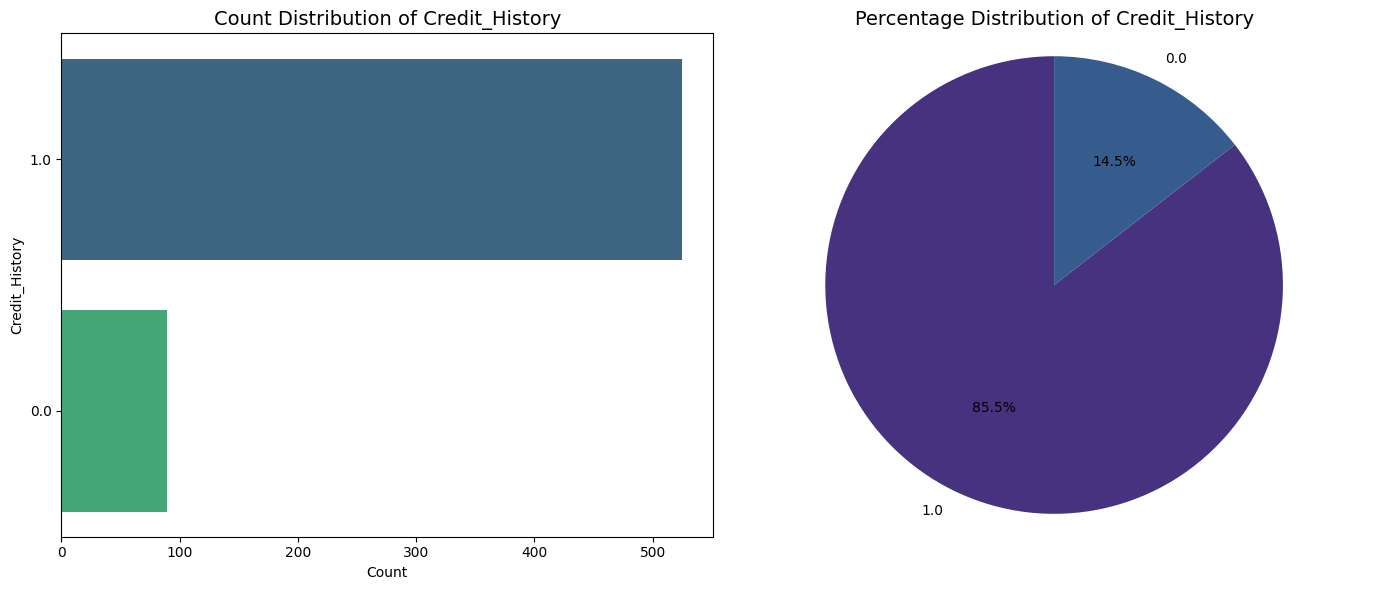

 Feature: Loan_Status
             Count  Percentage
Loan_Status                   
Y              422       68.73
N              192       31.27


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29468\3125292557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column, data=loan_data, order=freq.index, palette='viridis')


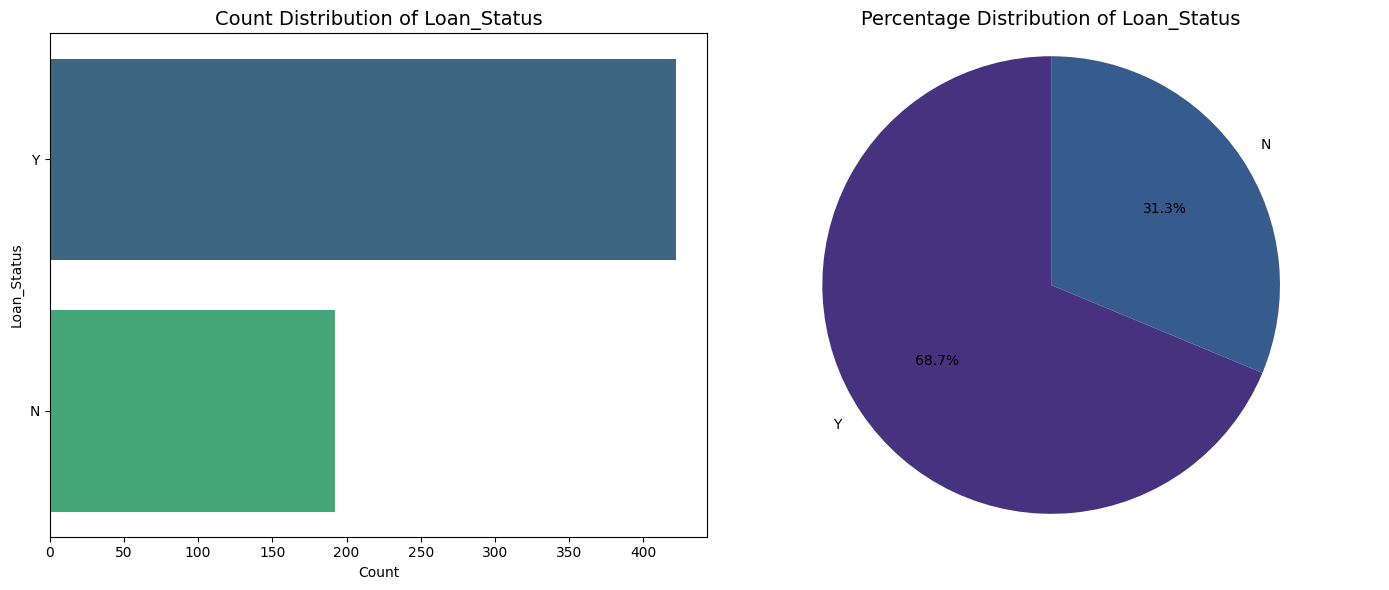

In [121]:
categorical = ['Gender','Married','Education','Self_Employed','Property_Area','Credit_History','Loan_Status']
for col in categorical:
    univariate_categorical_eda(loan_data, col)

### Task 2.4: Examine relationships between features and the target variable (loan approval status) using scatter plots, correlation matrices, and cross-tabulations.

In [122]:
numerical_cols = ['ApplicantIncome', 'LoanAmount','CoapplicantIncome']
# numerical_cols = pd.DataFrame(loan_data[numerical_cols])

In [123]:

def correlation_with_target(loan_data, feature,  target="Loan_Status"):
    """
    Plots and summarizes relationship between a numerical feature and a categorical target.
    """
    print(f" Feature: {feature} vs {target}")
    print("="*50)
    
    
    #group summary 
    # summary = loan_data.groupby(target[feature]).describe()[["mean","std","min", "max"]]
    # print(summary)
    # print()
    
    plt.figure(figsize=(10,5))
    
    # boxplot
    sns.boxplot(x=target,y=feature, data=loan_data, palette="Set2")
    plt.title(f'{feature} across {target} categories', fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()
    
   

 Feature: ApplicantIncome vs Loan_Status


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29468\90396701.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=feature, data=loan_data, palette="Set2")


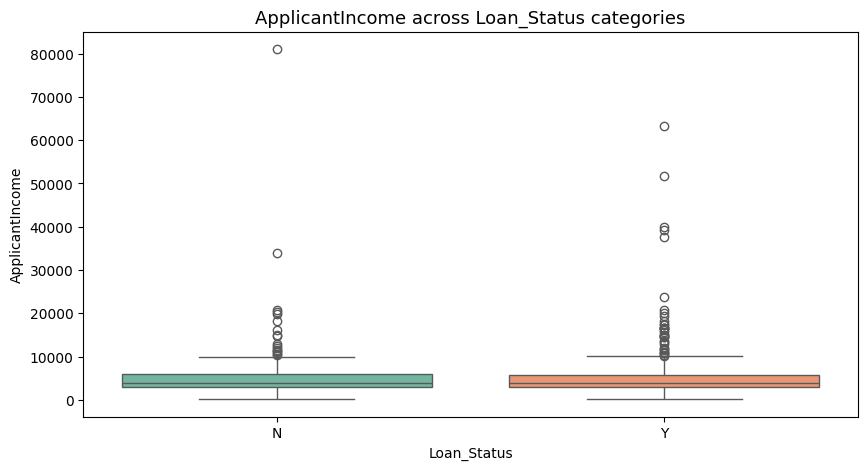

 Feature: LoanAmount vs Loan_Status


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29468\90396701.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=feature, data=loan_data, palette="Set2")


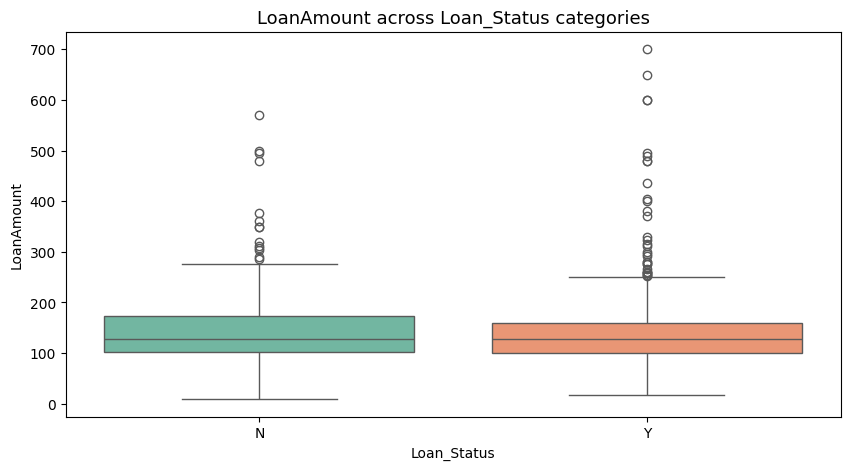

 Feature: CoapplicantIncome vs Loan_Status


C:\Users\SHOPINVERSE\AppData\Local\Temp\ipykernel_29468\90396701.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target,y=feature, data=loan_data, palette="Set2")


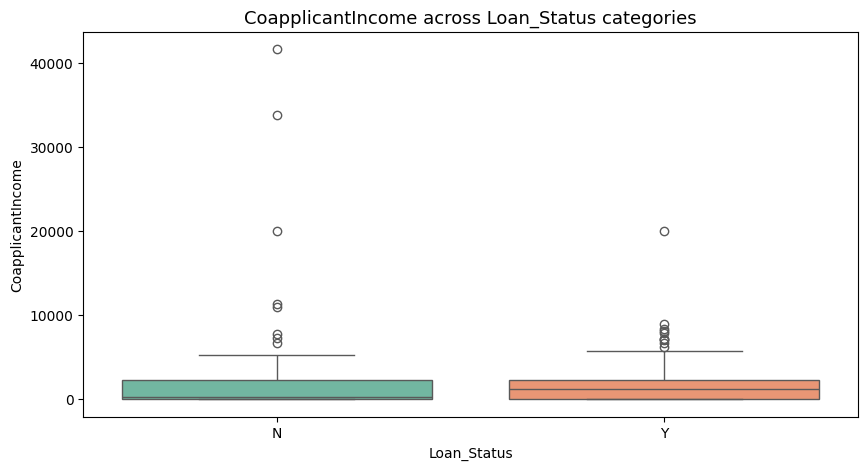

In [124]:
numerical_cols = ['ApplicantIncome', 'LoanAmount','CoapplicantIncome']
for col in numerical_cols:
    correlation_with_target(loan_data, col,target="Loan_Status")